# Nearest neighbor classifier 

**Aim:** Visualise the decision surface of a k-NN classifier.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

## Question 1


A) Make a function `plot(X,y=None)` that plots a scatter plot of a two dimensional data matrix `X` coloring the instances according to the one dimensional array `y` if it is not `None`.


B) Make a function `X,y = make_data(n_samples)` to create a data set for a binary classification problem.
The function outputs a two dimensional data matrix `X` and a corresponding one dimensional class vector `y`. 

You can use of the scikit function [make_classification](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). 

Study the function parameters. 

In the following you can use the configuration:

```
        n_features=2, 
        n_informative=2, 
        n_redundant=0, 
        n_repeated=0,
        n_classes=2, 
        n_clusters_per_class=2,
        class_sep=.7,
        flip_y=0.2,
        weights=[0.5,0.5]
```

**Additional references:** Faizan Ahemad, [Generating Synthetic Classification Data using Scikit](https://towardsdatascience.com/https-medium-com-faizanahemad-generating-synthetic-classification-data-using-scikit-1590c1632922), Towards Data Science, 2019



C) Use the scikit function [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train%20test#sklearn.model_selection.train_test_split) to create a data matrix (and corresponding target vector) for training and for test. 

Study the function parameters. 

Visualize the following:
```
plot(X_train,y_train)
plot(X_test,y_test)
```

In [21]:
def plot(X,y=None):
    # YOUR CODE HERE
    indexes_1 = [i for i in range(len(y)) if y[i]==1]
    indexes_2 = [i for i in range(len(y)) if y[i]==0]
    feature_class_1 = [X[i] for i in indexes_1]
    feature_class_2 = [X[i] for i in indexes_2]
    plt.scatter([i[0] for i in feature_class_1],[i[1] for i in feature_class_1])
    plt.scatter([i[0] for i in feature_class_2],[i[1] for i in feature_class_2])
    plt.ylabel('Class 1')
    plt.xlabel('Class 2')
    plt.show()
    #raise NotImplementedError() 

In [16]:
from sklearn.datasets import make_classification

def make_data(n_samples):
    # YOUR CODE HERE
    X,y = make_classification( n_features=2, 
        n_informative=2, 
        n_redundant=0, 
        n_repeated=0,
        n_classes=2, 
        n_clusters_per_class=2,
        class_sep=.7,
        flip_y=0.2,
        weights=[0.5,0.5])
    return X,y
    #raise NotImplementedError() 

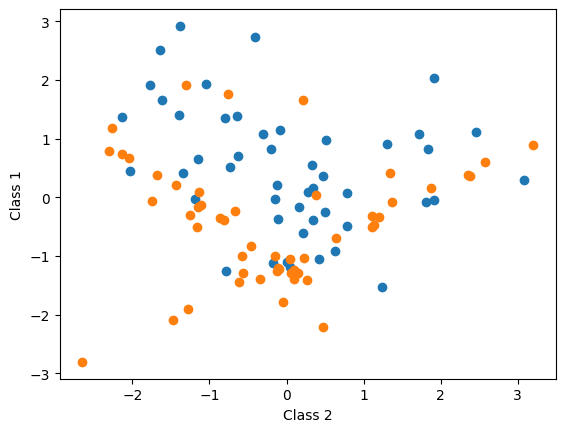

In [19]:
X,y = make_data(20)
plot(X,y)

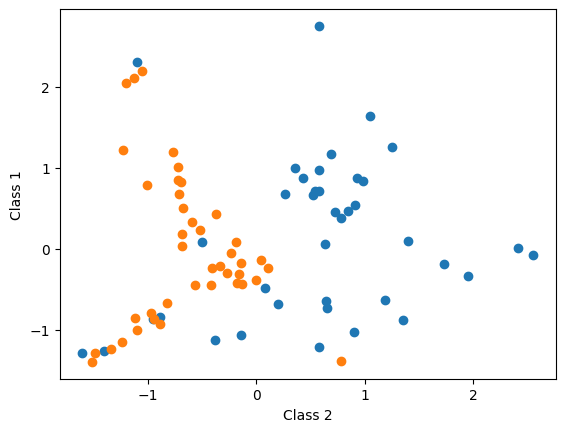

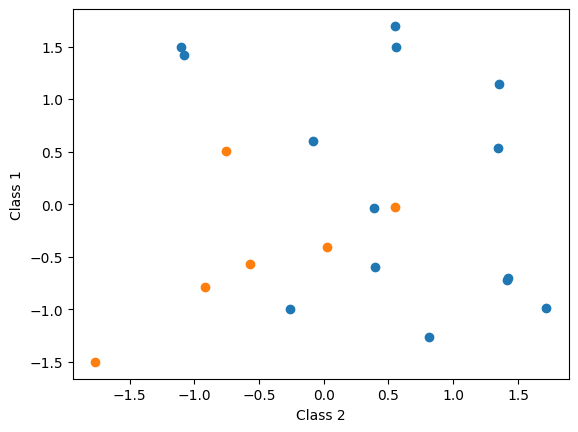

In [22]:
X,y = make_data(n_samples=1000)

from sklearn.model_selection import train_test_split

# YOUR CODE HERE
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
#raise NotImplementedError() 

plot(X_train,y_train)
plot(X_test,y_test)

## Question 2

Make a function `y_pred = predict_knn(X_test, X_train, y_train, k)` that outputs a one dimensional array containing the class predicted for `X_test` by the k-nearest neighbor algorithm for `k` neighbors over the data in `X_train, y_train`.

Do not use directly the scikit function [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).

Useful auxiliary functions to build `predict_knn` are:

- `distance(X1,X2)` in `scipy.spatial`
- `argsort(A)` in `numpy`
- `mode` in `scipy.stats`

Study the use of these function in the next cells.

In [23]:
# distance

from scipy.spatial import distance
data_mtx1 = [(1, 1),(2, 1),(1, 2),(2, 2)]
data_mtx2 = [(10, 10),(20, 10),(10, 20),(20, 20)]
D1 = distance.cdist(data_mtx1, data_mtx1)
D2 = distance.cdist(data_mtx1, data_mtx2)
print('Distance of each sample from other samples in the same data matrix')
print(D1)
print()
print('Distance of each sample in data_mtx1 from other samples in data_mtx2')
print(D2)

Distance of each sample from other samples in the same data matrix
[[0.         1.         1.         1.41421356]
 [1.         0.         1.41421356 1.        ]
 [1.         1.41421356 0.         1.        ]
 [1.41421356 1.         1.         0.        ]]

Distance of each sample in data_mtx1 from other samples in data_mtx2
[[12.72792206 21.02379604 21.02379604 26.87005769]
 [12.04159458 20.1246118  20.61552813 26.17250466]
 [12.04159458 20.61552813 20.1246118  26.17250466]
 [11.3137085  19.6977156  19.6977156  25.45584412]]


In [24]:
# argsort 

import numpy as np

mtx = np.random.randint(10, size=(5,3))
print('Original data')
print(mtx)
print()
print('the sorted indices, i.e. considering the elements in the order specified by the indices one obtains a sorted array')
ids = np.argsort(mtx, axis=1)
print(ids)
print('Make sure to understand the notion of axis')

Original data
[[2 0 1]
 [6 4 4]
 [5 1 5]
 [8 2 2]
 [0 9 7]]

the sorted indices, i.e. considering the elements in the order specified by the indices one obtains a sorted array
[[1 2 0]
 [1 2 0]
 [1 0 2]
 [1 2 0]
 [0 2 1]]
Make sure to understand the notion of axis


In [ ]:
# mode
import scipy as sp
import scipy.stats 

mtx = np.random.randint(5, size=(3,10))
print('Original data')
print(mtx)
print()
print('the mode, i.e. most frequent element')
print(sp.stats.mode(mtx, axis=1))

A,B = sp.stats.mode(mtx, axis=1)
print('Values')
print(A)
print()
print('Counts')
print(B)

In [ ]:
def predict_knn(X_test, X_train, y_train, k):
    # YOUR CODE HERE
    raise NotImplementedError() 

## Question 3

A) Make a function `make_grid(X, n_samples)` that outputs a two dimensional array containing in total `n_samples` instances in $\mathcal{R}^2$ arranged as a regular grid. Use the input data matrix `X` to extract the boundaries (i.e. the min, max values for each axis).

B) Make a function `plot_decision_surface(X,y,X_grid,yg)` that plots a scatter plot for the data matrix `X` and the grid points in the data matrix `X_grid` using `y` and `yg` respectively to color the instances. 

In [ ]:
def make_grid(X, n_samples):
    # YOUR CODE HERE
    raise NotImplementedError() 

In [ ]:
def plot_decision_surface(X,y,X_grid,yg):
    # YOUR CODE HERE
    raise NotImplementedError() 

In [ ]:
X_grid = make_grid(X_train, n_samples=4000)
plot(X_grid)

In [ ]:
y_pred = predict_knn(X_grid, X_train, y_train, k=1)
plot(X_grid,y_pred)

In [ ]:
yg = predict_knn(X_grid, X_train, y_train, k=1)
plot_decision_surface(X_test,y_test,X_grid,yg)

In [ ]:
yg = predict_knn(X_grid, X_train, y_train, k=7)
plot_decision_surface(X_test,y_test,X_grid,yg)